# Projects in Advanced Machine Learning

Columbia University, Spring 2023

Lyle Prockop  
contact: lp2974@columbia.edu

[Link to this repo](https://github.com/lprockop/AdvMLPortfolio)

This notebook should describe each project you worked on and provide a link to each of your project's notebooks.  Your project descriptions might include a description of the dataset you analyzed for the project, the types of predictive models you fit to the data, a comparison to the work of others on related competition leaderboards, and any other salient details you may wish to add.  You should also store each of the reports you created this semester in a subfolder of your Github repo.  Then provide a link to each file in your write up.

# Contents:

1. [World Happiness Classification](https://github.com/lprockop/AdvMLPortfolio/blob/main/Predict%20World%20Happiness/WorldHappinessReport.ipynb)

2. Covid X-Ray Classification

3. Movie Review Sentiment Classification

In [12]:
import pandas as pd
from IPython.display import Image

## 1. World Happiness Prediction

### [Link to report on GitHub](https://github.com/lprockop/AdvMLPortfolio/blob/main/Predict%20World%20Happiness/WorldHappinessReport.ipynb)

### Description of the project:
The aim of this modeling task was to predict the overall happiness level for a country given characteristics such as GDP per capita, social support, healthy life expectancy, % of population below the poverty line, life expectancy, etc.

### Description of the dataset:

88 countries in training set, 68 in test set

Features: 'Country or region', 'GDP per capita', 'Social support',
'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
'Perceptions of corruption', 'name', 'region', 'sub-region',
'Terrorist_attacks', 'country_name', 'population',
'population_below_poverty_line', 'hdi', 'life_expectancy',
'expected_years_of_schooling', 'mean_years_of_schooling', 'gni'

In [7]:
#descriptive statistics for the training set
pd.read_csv('Predict World Happiness/Output/descriptive stats.csv').set_index('Unnamed: 0')

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
Unnamed: 0,,,,,,,,,,,,,,
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,8.200000e+01,73.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,0.917148,1.213807,0.745693,0.379273,0.184705,0.115159,296.720179,4.313623e+07,26.831507,0.716861,72.186744,13.319645,8.839685,20131.641290
std,0.412638,0.293830,0.237671,0.156634,0.102516,0.103309,764.351472,1.581928e+08,17.046088,0.163273,8.553269,2.967324,3.167311,22350.275237
min,0.026000,0.000000,0.105000,0.000000,0.000000,0.000000,1.000000,3.350250e+05,2.700000,0.352440,50.080000,4.871620,1.658000,587.473961
25%,0.626000,1.113250,0.567000,0.267750,0.106750,0.049250,4.750000,4.670764e+06,14.900000,0.567079,65.175250,11.243590,6.205680,3762.033568
50%,0.960000,1.249500,0.806500,0.408000,0.179500,0.083500,38.500000,1.092274e+07,22.400000,0.743828,74.468000,13.394420,9.573405,12716.345550
75%,1.249000,1.463500,0.898250,0.493500,0.244500,0.145750,125.611111,3.211838e+07,33.000000,0.855455,78.234250,15.546385,11.690423,28189.062915
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,6023.000000,1.409517e+09,72.300000,0.949423,83.684000,19.228200,13.370000,129915.600900


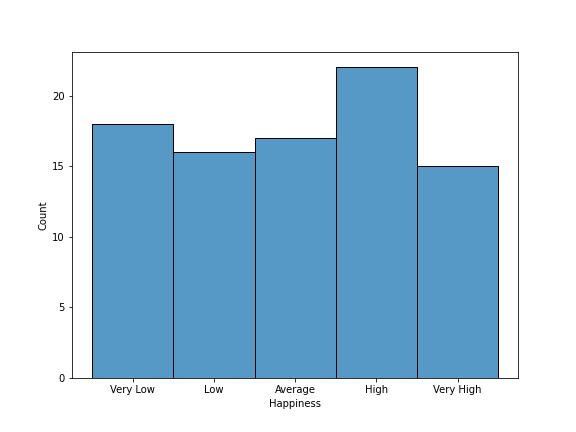

In [14]:
#distribution of dependent variable
Image('Predict World Happiness/Output/histogram of happiness.png')

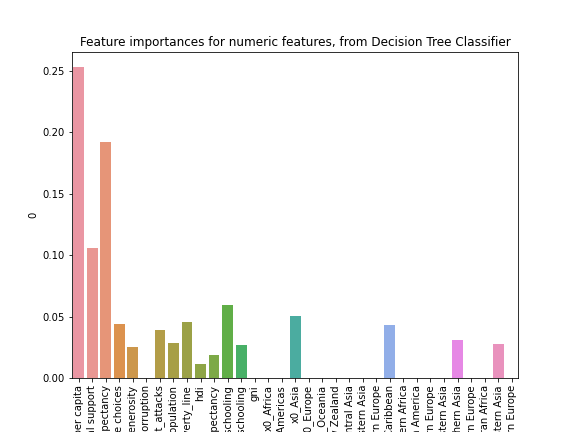

In [15]:
#feature importances (see region has been OHE)
Image('Predict World Happiness/Output/featimportances.png')

### Inspect my models (frameworks, accuracy, etc.)

First, I submitted a Gradient Boosting Classifier, Random Forest Classifier, and KNN Classifier. These models didn't perform particularly well and appeared to be overfit to the training data. The random forest had accuracy 0.441176 and f1 below 0.4 for both models. My team's advice was to test different architectures, including suggested a Bagging Classifier and SVC. They also suggested changing the hyper-parameters.

After hyper-parameter tuning, I submitted a Bagging Classifier, SVC, and a few other Gradient Boosting Classifiers with different hyper parameters. The final models are shown below.

Only two models had accuracy above 0.5. Neither had f1 scores above 0.5. The two best models were gradient boosted classifier and SVM.

Overall, the best performing model was a gradient boosted classifier with hyper parameters: {'learning_rate': 1, 'n_estimators': 101}. The accuracy was 0.529412 for this model and f1 score was 0.496121. All of the models and their comparative metrics are shown below.

In [18]:
pd.read_csv('Predict World Happiness/Output/my_results.csv').set_index('Unnamed: 0')

,accuracy,f1_score,precision,recall,ml_framework,model_type,username,timestamp,version
Unnamed: 0,,,,,,,,,
40,0.529412,0.496121,0.677778,0.537857,sklearn,GradientBoostingClassifier,lprockop,2023-02-03 21:06:32.633284,246
161,0.470588,0.469382,0.632821,0.484286,sklearn,GradientBoostingClassifier,lprockop,2023-01-31 22:43:05.553645,19
164,0.470588,0.469382,0.632821,0.484286,sklearn,GradientBoostingClassifier,lprockop,2023-02-02 22:21:28.005441,143
202,0.500000,0.495707,0.575983,0.524286,sklearn,SVC,lprockop,2023-02-06 19:07:27.821977,499
249,0.470588,0.440635,0.643939,0.495714,sklearn,RandomForestClassifier,lprockop,2023-01-31 22:42:08.360418,13
305,0.441176,0.437124,0.628333,0.444286,sklearn,GradientBoostingClassifier,lprockop,2023-02-03 19:31:15.663887,230
417,0.470588,0.446762,0.562821,0.484286,sklearn,RandomForestClassifier,lprockop,2023-02-06 19:03:43.939191,498
528,0.441176,0.444567,0.505556,0.440714,sklearn,BaggingClassifier,lprockop,2023-02-06 19:11:32.853546,501
531,0.441176,0.442290,0.503333,0.455714,sklearn,SVC,lprockop,2023-02-07 21:41:44.527334,919


### Leaderboard comparison

The single most succcessful model was a GradientBoostingClassifier, while the most successful on average was a DecisionTreeClassifier. The distribution for f1 scores and how my models compare to all submissions (in accuracy and f1 score) is shown below.

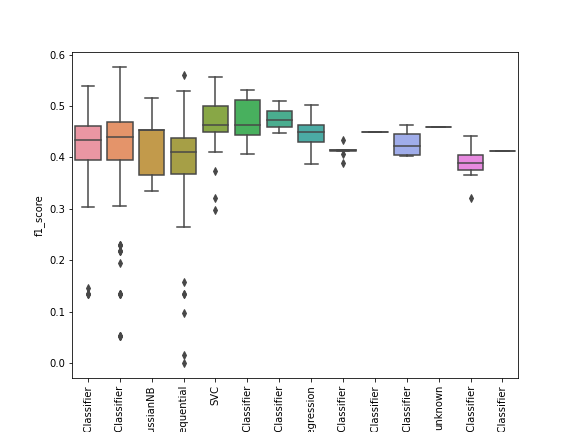

In [21]:
#model architectures submitted
Image('Predict World Happiness/Output/performance by model architecture.png')

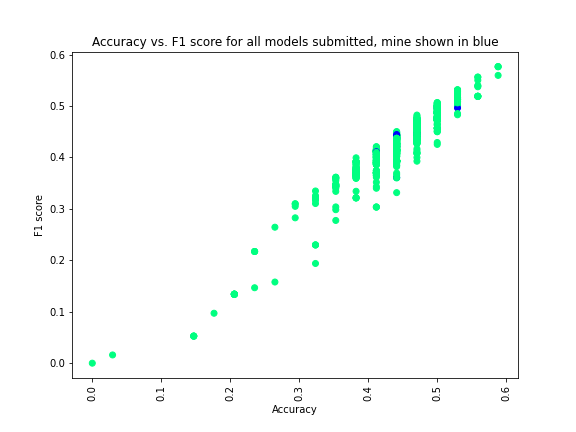

In [22]:
#model performance
Image('Predict World Happiness/Output/full model performance.png')

## 2. Covid X-Ray Classification

### [Link to report on GitHub](https://github.com/lprockop/AdvMLPortfolio/tree/main/Classify%20Covid%20X-Ray%20Images)

(Note: Image data is stored in Google Drive, so notebook must be run in Colab!)

### Description of the project:

The dataset has xray image data for patients with Covid, patients with pneumonia, and "normal" patients (neither Covid nor pneumonia). The features are arrays representing images and the targets are the classification of what type of patient they are (Covid, pneumonia, or normal). 

A predictive model might be practically useful because it could help diagnose people experiencing symptoms similar to Covid or pneumonia and understand which tests and treatment methods to prioritize.


### Description of the dataset:

The features are chest X-Ray images of patients and labels are 'Covid', 'Normal', and 'Pneumonia', corresponding to whether a patient has been diagnosed with either Covid or Pneumonia. The first 1345 images in the dataset were used in each category.

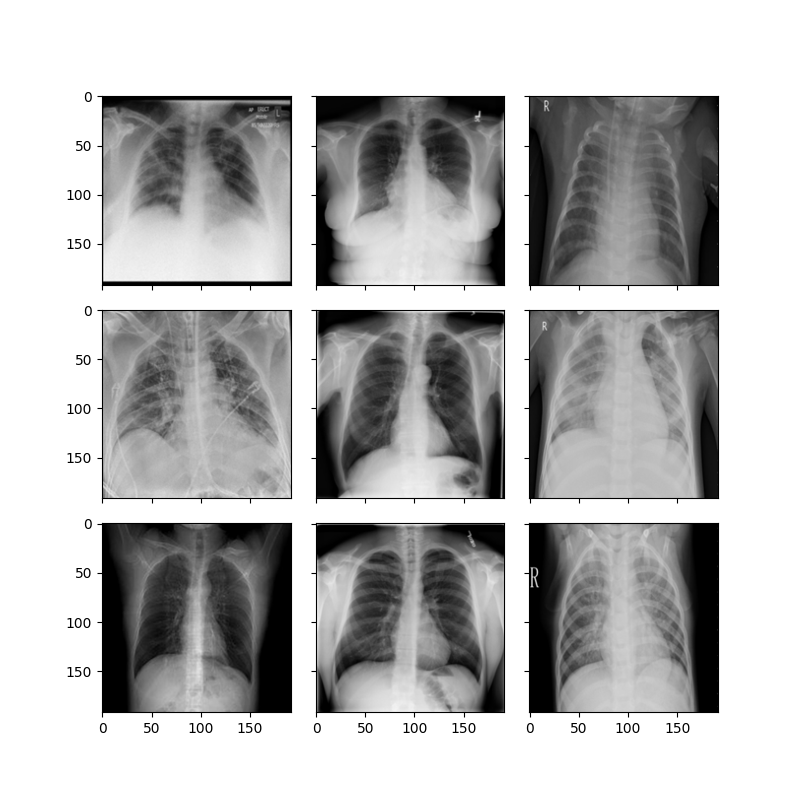

In [39]:
#sample images (order: Covid, Normal, Pneumonia)
Image('Classify Covid X-Ray Images/Output/covid.png')

### Inspect my models (frameworks, accuracy, etc.)

The three architectures I were explored were a vanilla/fully-connected neural network, a basic convolutional neural network, and a CNN that utilized transfer learning from VGG16.

My best model was a CNN with 5 convolutional layers. The layers were:

Conv2D with 32 3x3 filters, using same padding and relu activation  
Conv2D with 32 1x1 filters, using same padding and relu activation  
Max pooling layer with 2x2 pooling  
Conv2D with 64 3x3 filters, using same padding and relu activation  
Conv2D with 64 1x1 filters, using same padding and relu activation  
Max pooling layer with 2x2 pooling  
Conv2D with 128 3x3 filters, using same padding and relu activation  
Conv2D with 128 1x1 filters, using same padding and relu activation  
Max pooling layer with 2x2 pooling  
Conv2D with 512 3x3 filters, using same padding and relu activation  
Conv2D with 512 1x1 filters, using same padding and relu activation  
Max pooling layer with 2x2 pooling  
Conv2D with 512 3x3 filters, using same padding and relu activation  
Conv2D with 512 1x1 filters, using same padding and relu activation  
Max pooling layer with 2x2 pooling  

Then, it was flattened and outputted using softmax to a Dense layer with 3 categories. It was trained with 6 epochs and compiled using adam optimizer and categorical crossentropy as a loss function.

### Leaderboard comparison

Sequential models seemed to slightly outperform Functional models. Interestingly, there wasn't a clear trend for whether shallower or deeper models performed better, and models with more parameters tended to perform worse. My models' performance compared to all submissions is shown below. (Unfortunately, many submissions included only prediction labels and were missing metadata and hyperparam

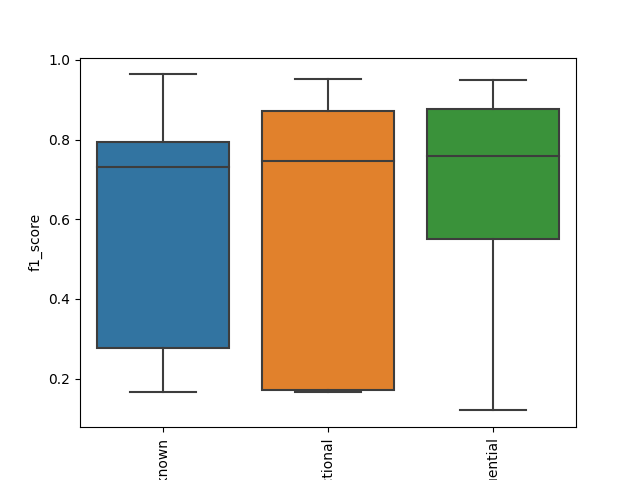

In [45]:
#model types
Image('Classify Covid X-Ray Images/Output/model2types.png')

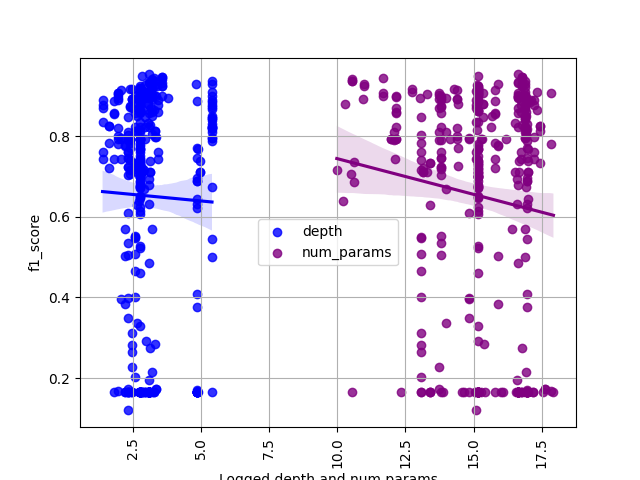

In [46]:
#how did depth and params affect models?
Image('Classify Covid X-Ray Images/Output/model2perf.png')

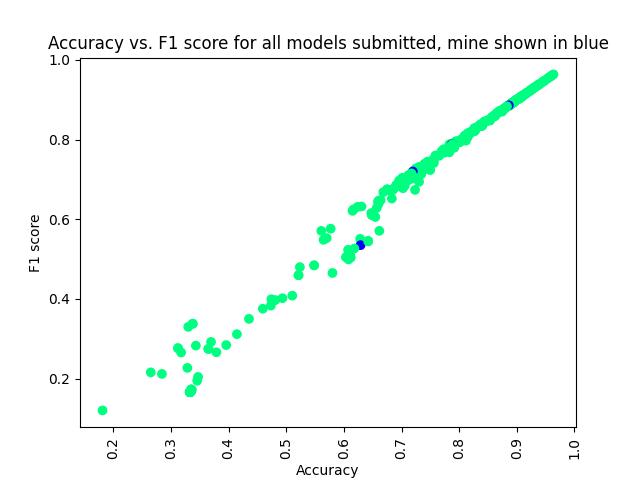

In [44]:
#all model submissions
Image('Classify Covid X-Ray Images/Output/full model performance.png')

## 3. SST Sentiment Classification

### [Link to report on GitHub](https://github.com/lprockop/AdvMLPortfolio/tree/main/Classify%20Movie%20Review%20Sentiment%20(SST))

### Description of the project:

The prediction task here is to determine whether a movie review has a positive or negative sentiment using Deep Learning models, including Embeddings, LSTM layers, Conv1D layers, and transfer learning. 

Predicting sentiment has a variety of applications, including generating overall impression scores (for example, a movie's composite rating could be gleaned from the percentage of reviews that are positive or negative) or identifying potential customer support issues for a company by identifying negative reviews.

### Description of the dataset:

The features in this dataset are movie reviews (text strings). The target is a binary variable to indicate whether the text has Positive or Negative sentiment.

### Inspect my models (frameworks, accuracy, etc.)

I tested 3 architectures: one with Embedding and LSTM layers, one with Embedding and Conv1D layers, and one that used transfer learning with glove embeddings.

My best-performing model was Sequential with depth of 5, including 1 embedding layer, 2 LSTM layers, no Conv1D layers, and RMS optimizer. When increasing the epochs from 10 to 100, the F1 score improved from 79.09% to 79.25%.

In [37]:
#inspect my models
pd.read_csv('Classify Movie Review Sentiment (SST)/Output/lprockopmodels.csv').set_index('Unnamed: 0')

,accuracy,f1_score,depth,num_params,optimizer,memory_size
Unnamed: 0,,,,,,
83,0.792536,0.790582,5.0,174658.0,RMSprop,699936.0
84,0.793633,0.792511,5.0,174658.0,RMSprop,699936.0
162,0.776070,0.773912,5.0,174658.0,RMSprop,699936.0
187,0.774973,0.774057,3.0,161282.0,RMSprop,645600.0
219,0.763996,0.762342,5.0,161294.0,RMSprop,646160.0
303,0.704720,0.700189,10.0,162170.0,RMSprop,650480.0
315,0.699232,0.697288,10.0,162170.0,RMSprop,650480.0
333,0.687157,0.682001,10.0,162170.0,RMSprop,650480.0
344,0.673985,0.673151,10.0,162170.0,RMSprop,650480.0


### Leaderboard comparison

While a model with Unknown architecture performed best, the best-performing models on average were Sequential models (shown in orange in boxplot below). For Sequential models, RMSProp was the best-performing optimizer. My model performance as compared with all submissions is shown below.

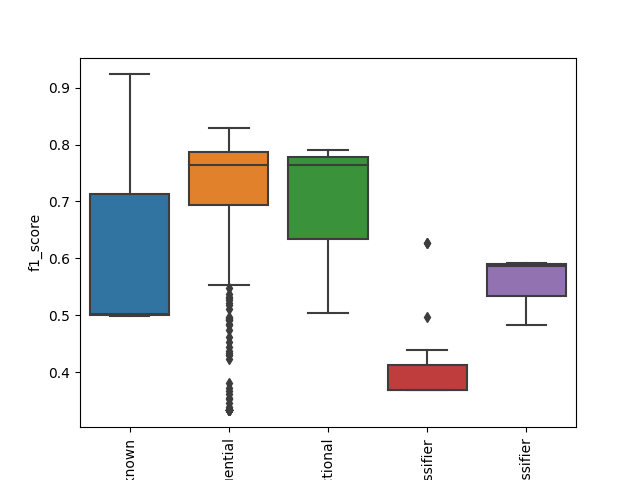

In [30]:
#best-performing architectures overall
Image('Classify Movie Review Sentiment (SST)/Output/sst_modelperf.png')

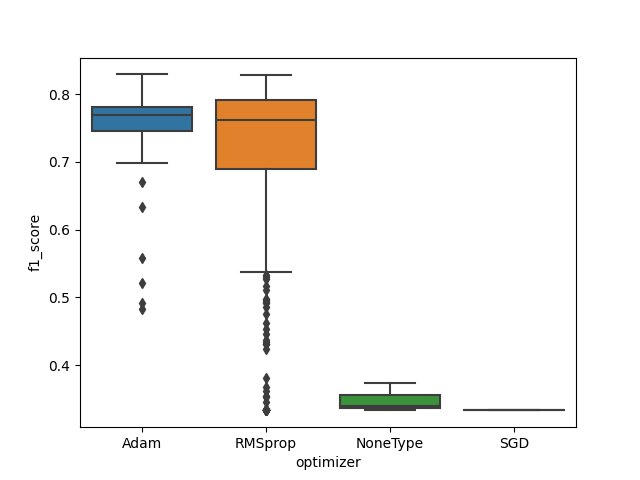

In [33]:
#which optimizer worked best for Sequential?
Image('Classify Movie Review Sentiment (SST)/Output/sst_seq_optimizer.png')

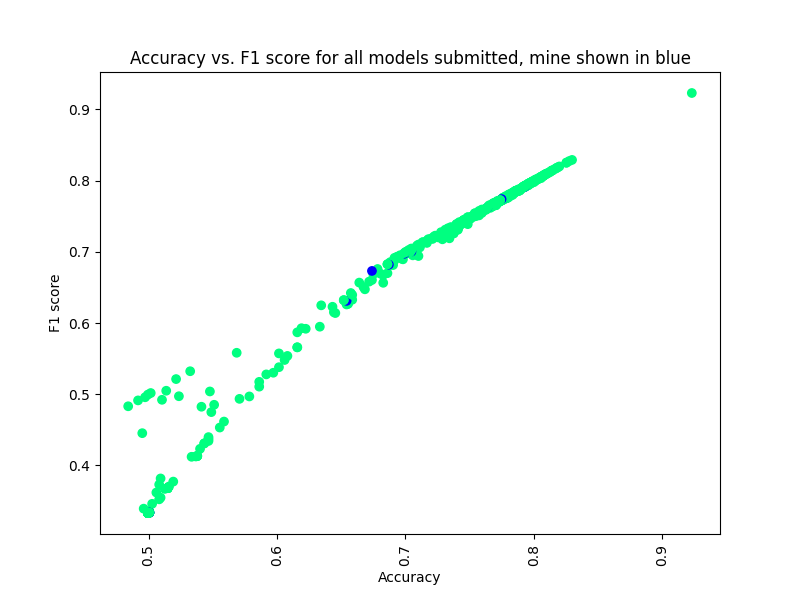

In [35]:
#overall model performance
Image('Classify Movie Review Sentiment (SST)/Output/full model performance.png')